<a href="https://colab.research.google.com/github/ErikaDenisse29/ColabFiles/blob/main/AplidetecnicasPLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 79.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


INICIANDO NLP
Texto original: En el Congreso Internacional de Inteligencia Artificial 2025 se discutieron avances muy importantes. @Maria comentó que la ética de la IA debe estar s...

=== EXPRESIONES REGULARES ===
URLs: ['http://ia-congreso2025.org']
Emails: ['contacto@ia2025.org']
Hashtags: ['#InteligenciaArtificial', '#ÉticaDigital']
Menciones: ['@Maria', '@ia2025']
=== NORMALIZACIÓN ===
Texto normalizado: en el congreso internacional de inteligencia artificial se discutieron avances muy importantes comen...
=== TOKENIZACIÓN ===
Número de tokens: 70
Tokens después de stopwords: 38
Lemas finales: 32

=== GRÁFICAS DE ANÁLISIS ===


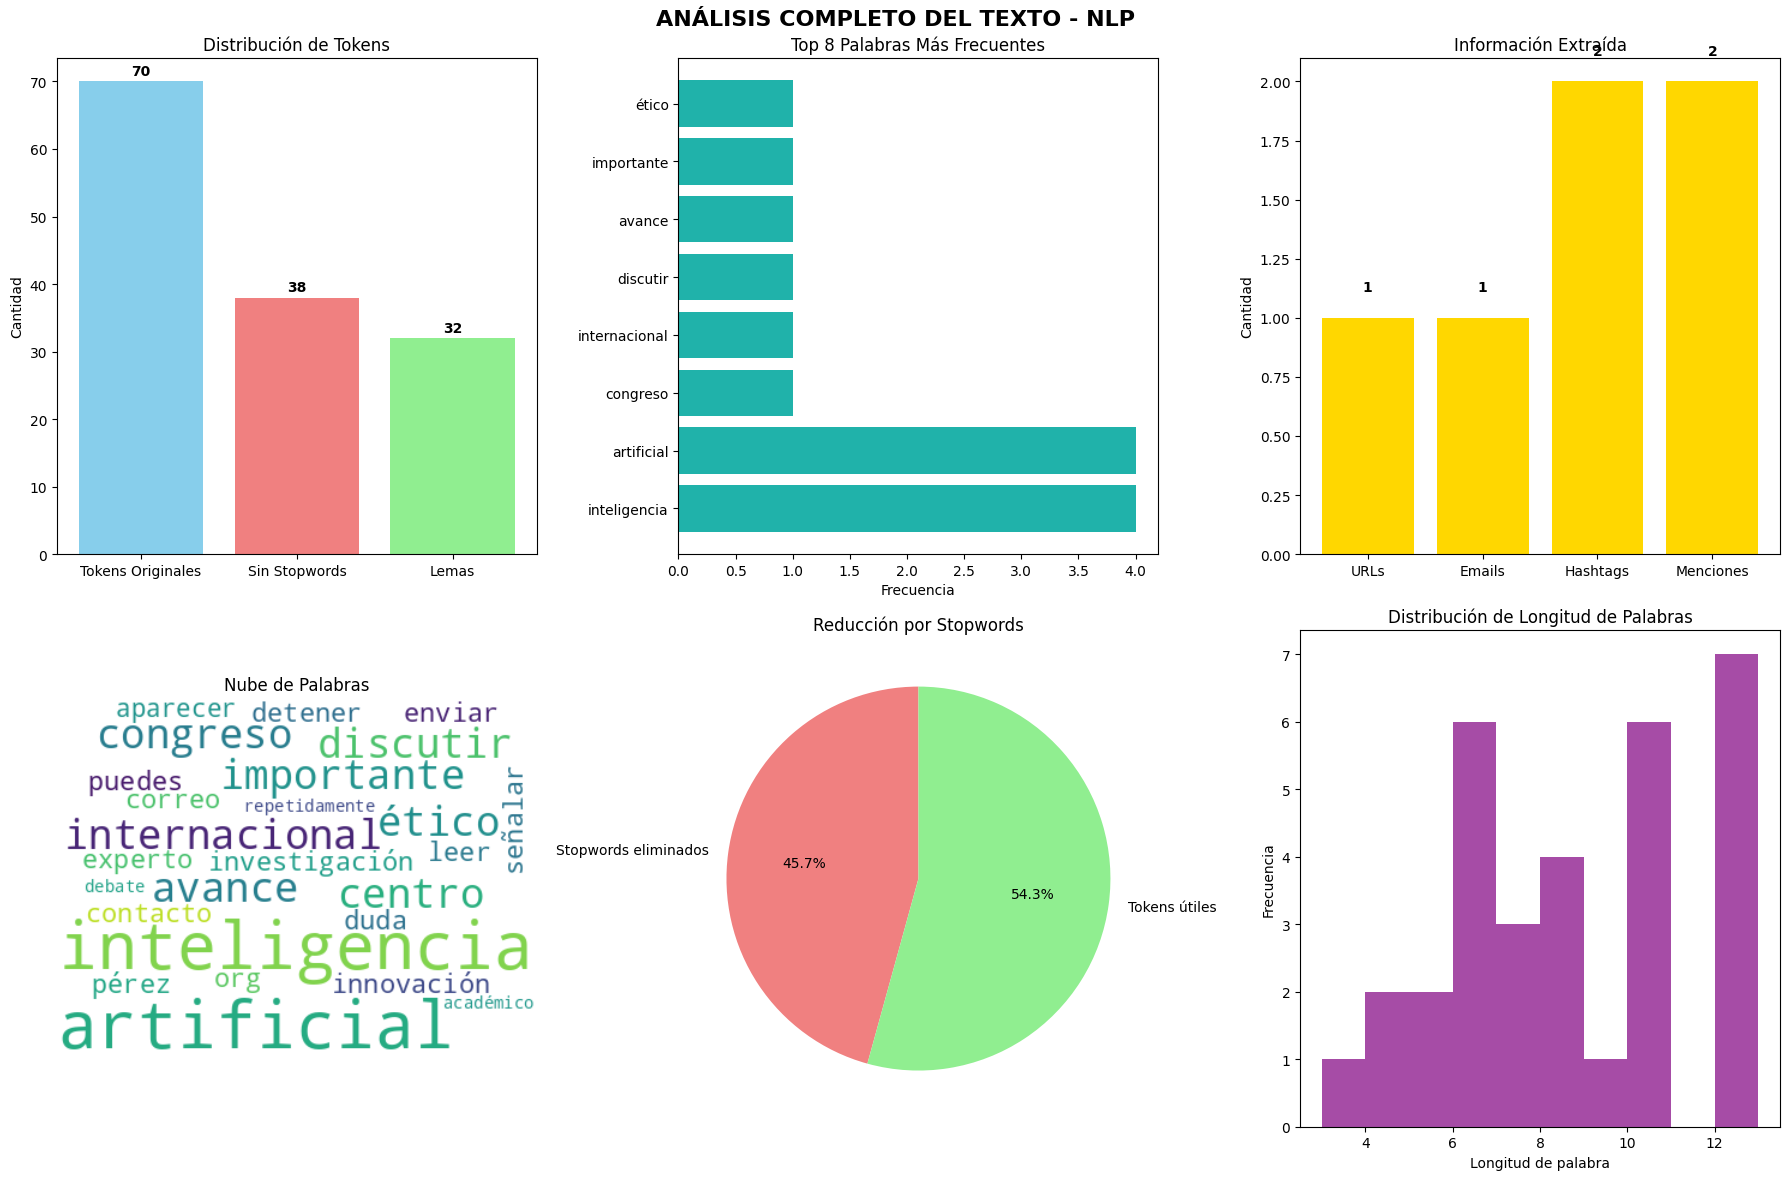

=== NORMALIZACIÓN ===


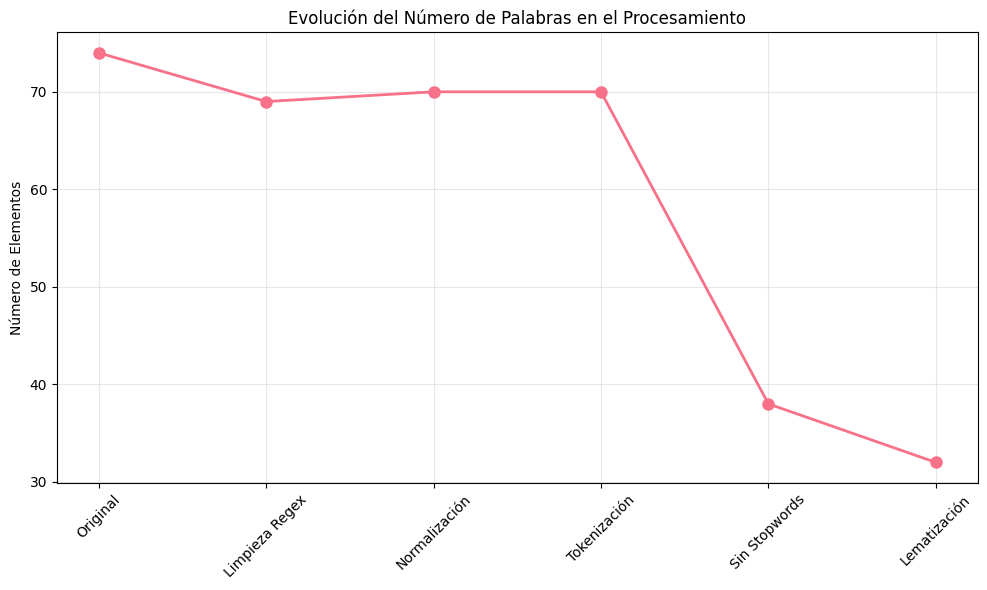


RESUMEN
Procesamiento completado exitosamente
Reducción del 45.7% por stopwords
 32 lemas listos para análisis
 1 URLs y 1 emails extraídos


In [18]:
import spacy
import re
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

nlp = spacy.load("es_core_news_sm")

texto = """En el Congreso Internacional de Inteligencia Artificial 2025 se discutieron avances muy importantes. @Maria comentó que la ética de la IA debe estar siempre en el centro de las investigaciones. Puedes leer más en http://ia-congreso2025.org o enviar tus dudas al correo contacto@ia2025.org. El Dr. Pérez afirmó: "¡La innovación no se detiene!". #InteligenciaArtificial #ÉticaDigital Además, varios expertos señalaron que la inteligencia artificial, la inteligencia artificial y la inteligencia artificial aparecen repetidamente en los debates académicos."""

# 1. FUNCIÓN DE EXPRESIONES REGULARES
def aplicar_expresiones_regulares(texto):
    print("=== EXPRESIONES REGULARES ===")
    resultados = {}
    resultados['urls'] = re.findall(r'http://\S+', texto)
    resultados['emails'] = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', texto)
    resultados['hashtags'] = re.findall(r'#\w+', texto)
    resultados['menciones'] = re.findall(r'@\w+', texto)

    texto_limpio = re.sub(r'http\S+', '', texto)
    texto_limpio = re.sub(r'[@#]\w+', '', texto_limpio)
    texto_limpio = re.sub(r'\d+', '', texto_limpio)

    print("URLs:", resultados['urls'])
    print("Emails:", resultados['emails'])
    print("Hashtags:", resultados['hashtags'])
    print("Menciones:", resultados['menciones'])

    resultados['texto_limpio'] = texto_limpio
    return resultados

# 2. FUNCIÓN DE NORMALIZACIÓN
def normalizar_texto(texto):
    print("=== NORMALIZACIÓN ===")
    texto_normalizado = texto.lower()
    texto_normalizado = re.sub(r'[^\w\sáéíóúñ]', ' ', texto_normalizado)
    texto_normalizado = re.sub(r'\s+', ' ', texto_normalizado).strip()
    return texto_normalizado

# 3. FUNCIÓN DE TOKENIZACIÓN
def tokenizar_texto(texto):
    print("=== TOKENIZACIÓN ===")
    doc = nlp(texto)
    tokens = [token.text for token in doc if not token.is_space]
    return tokens

# 4. FUNCIÓN DE ELIMINACIÓN DE STOPWORDS
def eliminar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish'))
    stop_words_adicionales = {'si', 'así', 'sí', 'sino', 'sólo', 'tan', 'tanto'}
    stop_words.update(stop_words_adicionales)
    tokens_sin_stopwords = [token for token in tokens if token.lower() not in stop_words and len(token) > 2]
    return tokens_sin_stopwords

# 5. FUNCIÓN DE LEMATIZACIÓN
def lematizar_tokens(tokens):
    texto_temp = ' '.join(tokens)
    doc = nlp(texto_temp)
    lemas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]
    return lemas

# 6. FUNCIÓN PARA GRÁFICAS
def crear_graficas(tokens, tokens_limpios, lemas, resultados_regex):
    print("\n=== GRÁFICAS DE ANÁLISIS ===")

    plt.style.use('default')
    sns.set_palette("husl")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('ANÁLISIS COMPLETO DEL TEXTO - NLP', fontsize=16, fontweight='bold')

    # 1. Gráfica de distribución de tokens
    categorias = ['Tokens Originales', 'Sin Stopwords', 'Lemas']
    valores = [len(tokens), len(tokens_limpios), len(lemas)]

    axes[0, 0].bar(categorias, valores, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[0, 0].set_title('Distribución de Tokens')
    axes[0, 0].set_ylabel('Cantidad')
    for i, v in enumerate(valores):
        axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

    # 2. Gráfica de palabras más frecuentes
    freq_lemas = Counter(lemas)
    palabras_comunes = freq_lemas.most_common(8)
    palabras = [item[0] for item in palabras_comunes]
    frecuencias = [item[1] for item in palabras_comunes]

    axes[0, 1].barh(palabras, frecuencias, color='lightseagreen')
    axes[0, 1].set_title('Top 8 Palabras Más Frecuentes')
    axes[0, 1].set_xlabel('Frecuencia')

    # 3. Gráfica de información extraída
    info_categorias = ['URLs', 'Emails', 'Hashtags', 'Menciones']
    info_valores = [
        len(resultados_regex['urls']),
        len(resultados_regex['emails']),
        len(resultados_regex['hashtags']),
        len(resultados_regex['menciones'])
    ]

    axes[0, 2].bar(info_categorias, info_valores, color='gold')
    axes[0, 2].set_title('Información Extraída')
    axes[0, 2].set_ylabel('Cantidad')
    for i, v in enumerate(info_valores):
        axes[0, 2].text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

    # 4. Word Cloud
    try:
        text_for_wordcloud = ' '.join(lemas)
        wordcloud = WordCloud(width=400, height=300, background_color='white',
                             colormap='viridis').generate(text_for_wordcloud)

        axes[1, 0].imshow(wordcloud, interpolation='bilinear')
        axes[1, 0].set_title('Nube de Palabras')
        axes[1, 0].axis('off')
    except:
        axes[1, 0].text(0.5, 0.5, 'Error generando wordcloud', ha='center', va='center')
        axes[1, 0].set_title('Nube de Palabras (Error)')
        axes[1, 0].axis('off')

    # 5. Gráfica de proporción de reducción
    reduccion = ((len(tokens) - len(tokens_limpios)) / len(tokens)) * 100
    labels = ['Stopwords eliminados', 'Tokens útiles']
    sizes = [reduccion, 100 - reduccion]
    colors = ['lightcoral', 'lightgreen']

    axes[1, 1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Reducción por Stopwords')

    # 6. Gráfica de longitud de palabras
    longitudes = [len(palabra) for palabra in lemas]
    axes[1, 2].hist(longitudes, bins=10, color='purple', alpha=0.7)
    axes[1, 2].set_title('Distribución de Longitud de Palabras')
    axes[1, 2].set_xlabel('Longitud de palabra')
    axes[1, 2].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

    # Gráfica adicional: Evolución del proceso
    fig2, ax = plt.subplots(figsize=(10, 6))
    etapas = ['Original', 'Limpieza Regex', 'Normalización', 'Tokenización', 'Sin Stopwords', 'Lematización']
    conteos = [
        len(texto.split()),
        len(resultados_regex['texto_limpio'].split()),
        len(normalizar_texto(resultados_regex['texto_limpio']).split()),
        len(tokens),
        len(tokens_limpios),
        len(lemas)
    ]

    ax.plot(etapas, conteos, marker='o', linestyle='-', linewidth=2, markersize=8)
    ax.set_title('Evolución del Número de Palabras en el Procesamiento')
    ax.set_ylabel('Número de Elementos')
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 7. FUNCIÓN COMPLETA
def pipeline_nlp_completo(texto):
    print("INICIANDO NLP")
    print("Texto original:", texto[:150] + "...\n")

    resultado_regex = aplicar_expresiones_regulares(texto)
    texto_limpio = resultado_regex['texto_limpio']

    texto_normalizado = normalizar_texto(texto_limpio)
    print("Texto normalizado:", texto_normalizado[:100] + "...")

    tokens = tokenizar_texto(texto_normalizado)
    print("Número de tokens:", len(tokens))

    tokens_limpios = eliminar_stopwords(tokens)
    print("Tokens después de stopwords:", len(tokens_limpios))

    lemas = lematizar_tokens(tokens_limpios)
    print("Lemas finales:", len(lemas))

    crear_graficas(tokens, tokens_limpios, lemas, resultado_regex)

    resultados = {
        'regex': resultado_regex,
        'tokens': tokens,
        'tokens_limpios': tokens_limpios,
        'lemas': lemas,
        'estadisticas': {
            'tokens_originales': len(tokens),
            'tokens_limpios': len(tokens_limpios),
            'lemas': len(lemas),
            'reduccion_stopwords': f"{((len(tokens) - len(tokens_limpios)) / len(tokens) * 100):.1f}%"
        }
    }

    return resultados

if __name__ == "__main__":

    resultados = pipeline_nlp_completo(texto)

    print("\n" + "="*60)
    print("RESUMEN")
    print("="*60)
    print(f"Procesamiento completado exitosamente")
    print(f"Reducción del {resultados['estadisticas']['reduccion_stopwords']} por stopwords")
    print(f" {len(resultados['lemas'])} lemas listos para análisis")
    print(f" {len(resultados['regex']['urls'])} URLs y {len(resultados['regex']['emails'])} emails extraídos")